In [1]:
### Setting env
import os, sys

folder = os.getcwd()
if(not(folder.endswith('tcc-machine-learning'))):
        os.chdir('..')
folder = os.getcwd()

### Core Packages
import pandas as pd
import numpy as np

### Visualization Packages
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
import plotly.graph_objects as go

### Financial Packages
import yfinance as yf
import pandas_datareader as pdr

### Thecnical Analysis Packages
import pandas_datareader as pdr
import ta
import pandas_ta as pdta
import talib

### Functions
from dags import config
from dags.utils import chose_path_to_work, save_image

### Others
import warnings

#### Loading Data

In [2]:
ticker = 'petr4.sa'
df_ticker = pd.read_csv(f'data/raw/{ticker}.csv', encoding='utf8', delimiter=',')
df_ticker['date'] = pd.to_datetime(df_ticker['date'])
df_ticker = df_ticker.loc[(df_ticker['date'] >= config.DATE_START) & (df_ticker['date'] <= config.DATE_END)]

In [3]:
fig = go.Figure(data = go.Ohlc(
    x = df_ticker.date,
    open = df_ticker.open,
    high = df_ticker.high,
    low = df_ticker.low,
    close = df_ticker.close
))
fig.show()

<AxesSubplot:title={'center':'Média Móvel Simples'}>

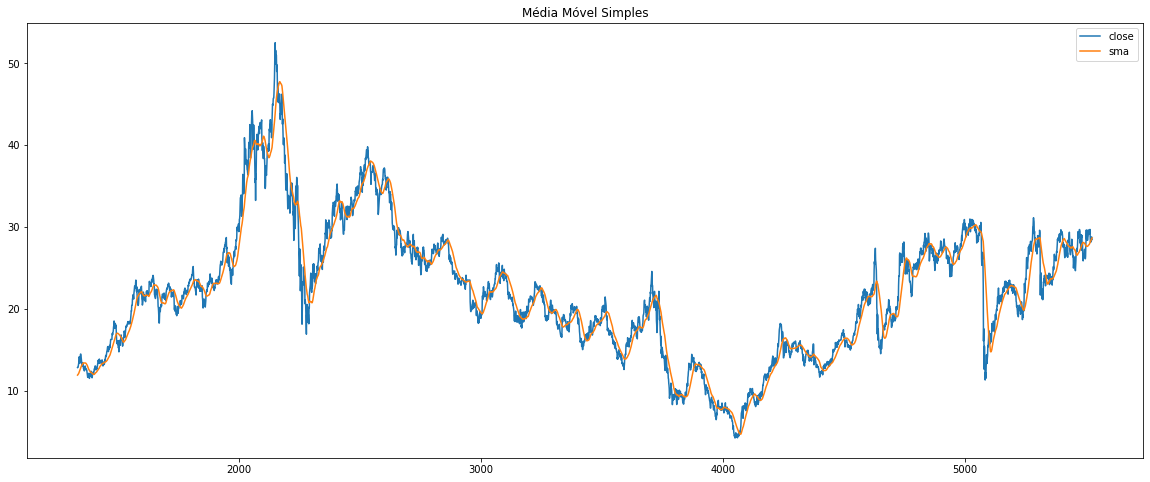

In [4]:
df_ticker['sma'] = talib.SMA(df_ticker.close, 30)
df_ticker[['close', 'sma']].dropna().plot(
    title = 'Média Móvel Simples',
    figsize=(20,8)
)

<AxesSubplot:title={'center':'Bandas de Bollinger'}, xlabel='date'>

<Figure size 1440x864 with 0 Axes>

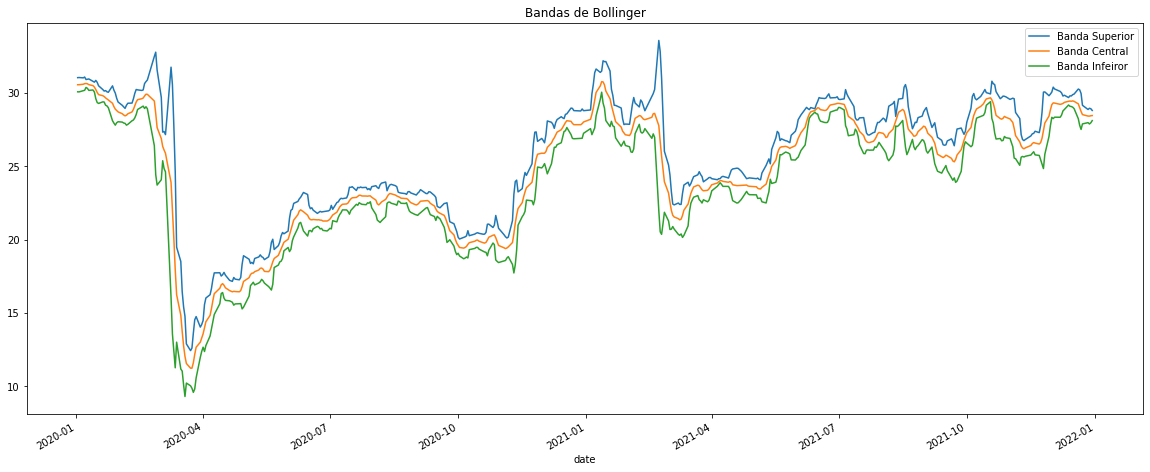

In [27]:
df_ticker['Banda Superior'], df_ticker['Banda Central'], df_ticker['Banda Infeiror'] = talib.BBANDS(df_ticker.close, matype=talib.MA_Type.T3)

plt.figure(figsize = (20, 12))
df_ticker[['date', 'Banda Superior', 'Banda Central', 'Banda Infeiror']].loc[df_ticker['date'] >= '2020-01-01'].dropna().plot(
    title = 'Bandas de Bollinger',
    figsize=(20,8),
    x = 'date'
)

###! Utilizar um atributo detectando quando é cruzado uma das bandas !###

<AxesSubplot:title={'center':'Índice de Força Relativa'}, xlabel='date'>

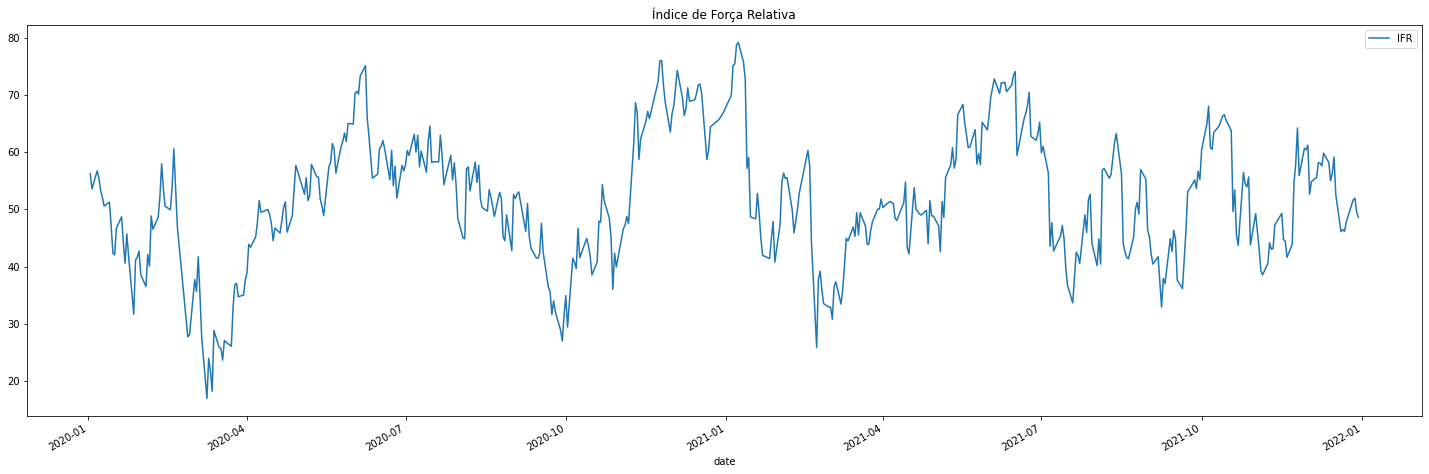

In [32]:
df_ticker['IFR'] = talib.RSI(df_ticker.close, timeperiod=14)
df_ticker[['date', 'IFR']].loc[df_ticker['date'] >= '2020-01-01'].dropna().plot(
    title = 'Índice de Força Relativa',
    figsize=(25,8),
    x = 'date'
)

<AxesSubplot:title={'center':'MACD'}, xlabel='date'>

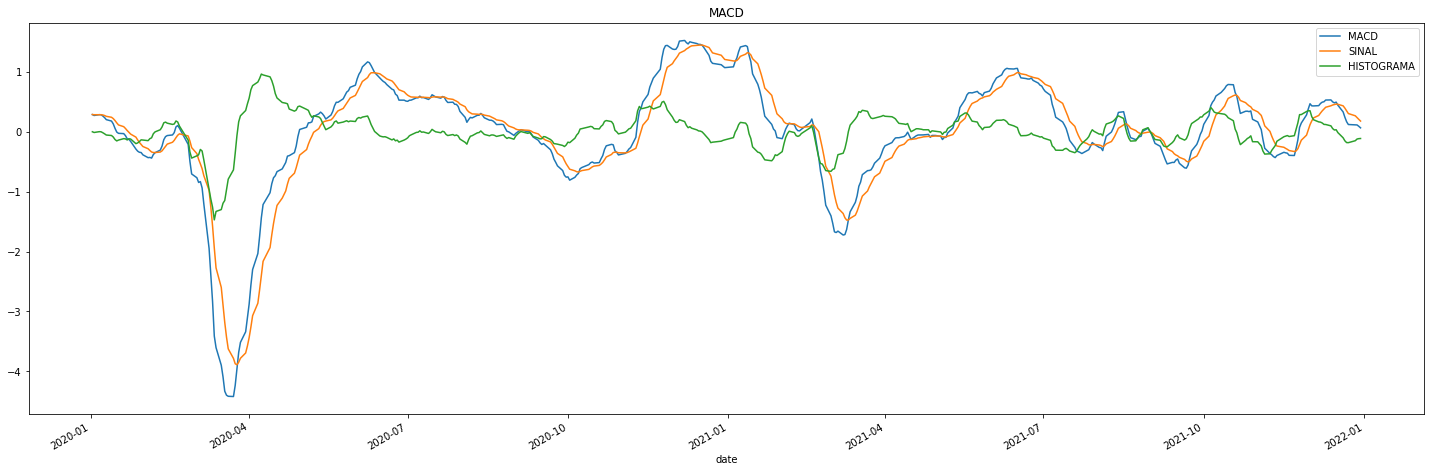

In [22]:
df_ticker['MACD'], df_ticker['SINAL'], df_ticker['HISTOGRAMA'] = talib.MACD(df_ticker.close, fastperiod=12, slowperiod=26, signalperiod=9)
df_ticker[['date', 'MACD', 'SINAL', 'HISTOGRAMA']].loc[df_ticker['date'] >= '2020-01-01'].dropna().plot(
    title = 'MACD',
    figsize=(25,8),
    x = 'date'
)

<AxesSubplot:title={'center':'MACD'}, xlabel='date'>

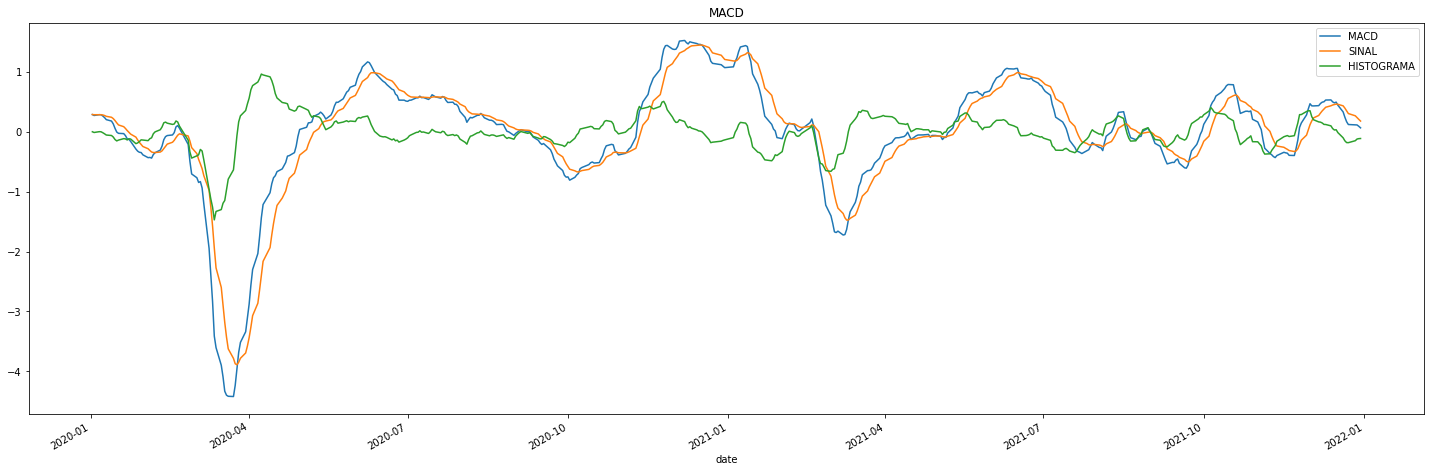

In [ ]:
df_ticker['MACD'], df_ticker['SINAL'], df_ticker['HISTOGRAMA'] = talib.MACD(df_ticker.close, fastperiod=12, slowperiod=26, signalperiod=9)
df_ticker[['date', 'MACD', 'SINAL', 'HISTOGRAMA']].loc[df_ticker['date'] >= '2020-01-01'].dropna().plot(
    title = 'MACD',
    figsize=(25,8),
    x = 'date'
)

In [21]:
df_ticker

,date,open,high,low,close,adj_close,volume,sma,bb_upper,bb_middle,...,macdhist,slowk,slowd,mme200,mme50,MACD,SINAL_MACD,HISTOGRAMA_MACD,SINAL,HISTOGRAMA
1304,2005-01-03,12.187500,12.237500,11.773750,11.775000,5.266281,30044800,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1305,2005-01-04,11.873750,11.950000,11.625000,11.635000,5.203671,37667200,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1306,2005-01-05,11.662500,11.772500,11.475000,11.590000,5.183545,30873600,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1307,2005-01-06,11.652500,11.687500,11.487500,11.625000,5.199197,28224000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1308,2005-01-07,11.648750,11.787500,11.563750,11.676250,5.222118,25980800,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5523,2021-12-23,28.330000,28.420000,28.150000,28.330000,23.237991,28713600,28.404333,29.148615,28.514214,...,-0.182759,25.547179,23.540543,27.047105,28.268807,0.120261,0.303020,-0.182759,0.303020,-0.182759
5524,2021-12-27,28.320000,28.780001,28.150000,28.750000,23.582502,44227900,28.481000,28.862559,28.414809,...,-0.150021,50.435160,32.477205,27.064049,28.287678,0.115494,0.265515,-0.150021,0.265515,-0.150021
5525,2021-12-28,29.010000,29.280001,28.700001,28.780001,23.607111,30688100,28.540667,28.947815,28.411368,...,-0.122144,64.089343,46.690560,27.081123,28.306985,0.112835,0.234979,-0.122144,0.234979,-0.122144
5526,2021-12-29,28.700001,28.900000,28.420000,28.540001,23.410248,35508400,28.583000,28.913739,28.435174,...,-0.115726,67.538765,60.687756,27.095639,28.316122,0.090321,0.206047,-0.115726,0.206047,-0.115726


In [8]:
df_ticker['slowk'], df_ticker['slowd'] = talib.STOCH(df_ticker.high, df_ticker.low, df_ticker.close, fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)

<AxesSubplot:title={'center':'slowk'}>

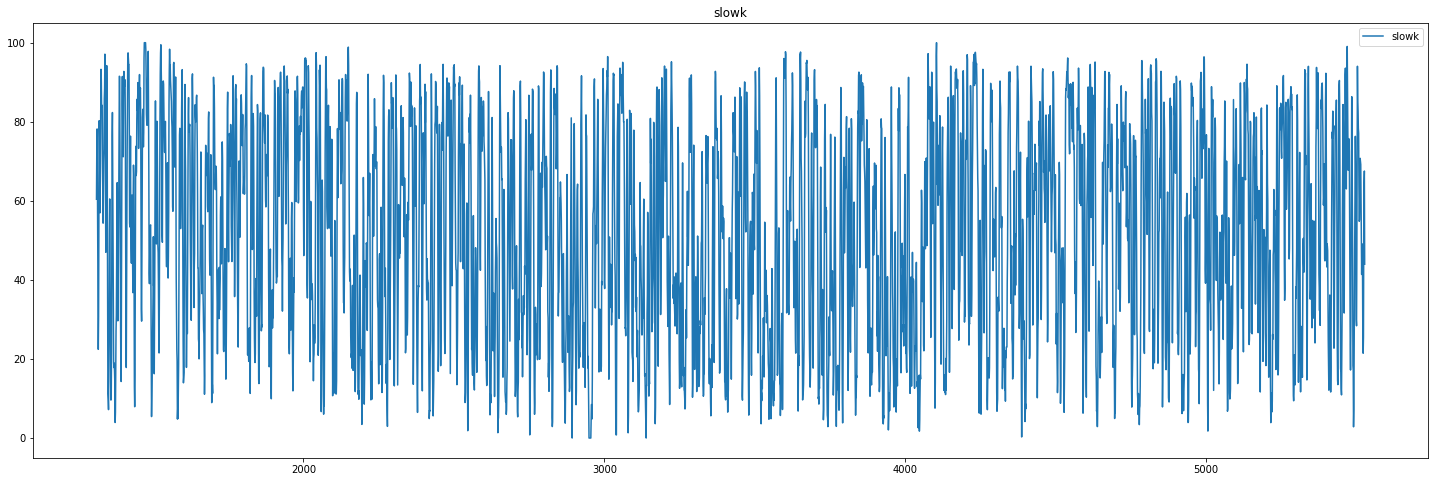

In [9]:
df_ticker[['slowk']].dropna().plot(
    title = 'slowk',
    figsize=(25,8)
)

In [10]:
df_ticker['mme200']= talib.EMA(df_ticker.close, timeperiod=200)
df_ticker['mme50']= talib.EMA(df_ticker.close, timeperiod=50)